## <b> FUNCATION TRANSFORMER</b>

### Variouss of the fucntion transformers:
* log transformer: make the data more normally distributed (normally distributed datas are easier to work with).
* reciprocal tranformer
* square root transformer
* coustom transformer(we make the tranfomer as we like)

### 1. Log Tranformer
$$ X'=\log_{10}(X) $$
The thing is that log of the value is taken in the log transfomer

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv('C:/Users/Acer/OneDrive/Documents/MACLEARNING/machinelearning/data/advertising.csv')

In [18]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [19]:
data=data.drop(columns=['Ad Topic Line','Country','Timestamp','City'])

In [20]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Clicked on Ad               0
dtype: int64

In [21]:
np.round(data.describe(),1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,65.0,36.0,55000.0,180.0,0.5,0.5
std,15.9,8.8,13414.6,43.9,0.5,0.5
min,32.6,19.0,13996.5,104.8,0.0,0.0
25%,51.4,29.0,47031.8,138.8,0.0,0.0
50%,68.2,35.0,57012.3,183.1,0.0,0.5
75%,78.5,42.0,65470.6,218.8,1.0,1.0
max,91.4,61.0,79484.8,270.0,1.0,1.0


In [22]:
X=data.drop(columns=['Clicked on Ad'])

In [23]:
Y=data['Clicked on Ad']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=20,test_size=0.2)
x_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
504,66.12,49,39031.89,113.80,0
839,57.82,46,48867.36,107.56,1
141,37.51,30,52097.32,163.00,1
825,83.69,36,68717.00,192.57,0
470,43.84,36,70592.81,167.42,0


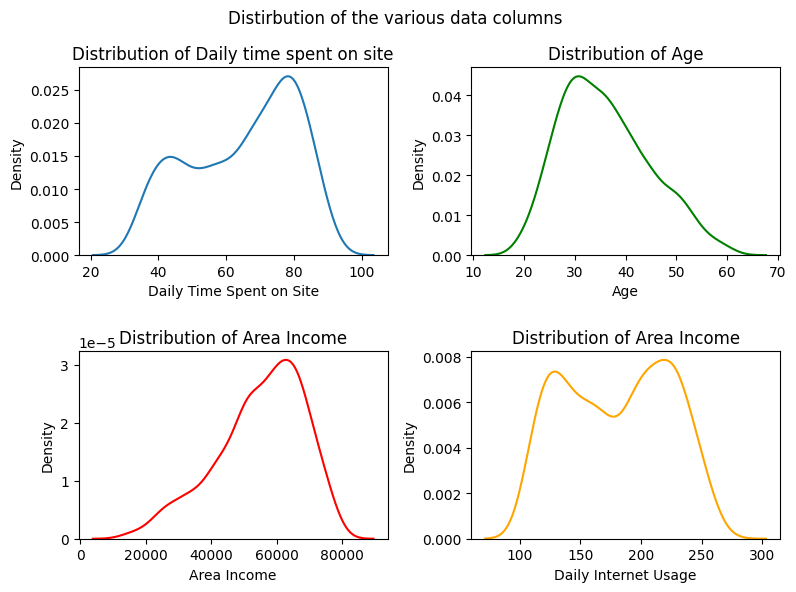

In [25]:
plt.figure(figsize=(8,6))
plt.subplot(221)
sns.kdeplot(data['Daily Time Spent on Site'])
plt.title('Distribution of Daily time spent on site')
plt.subplot(222)
sns.kdeplot(data['Age'],color='green')
plt.title('Distribution of Age')
plt.subplot(223)
sns.kdeplot(data['Area Income'],color='red')
plt.title('Distribution of Area Income')
plt.subplot(224)
sns.kdeplot(data['Daily Internet Usage'],color='orange')
plt.title('Distribution of Area Income')
plt.suptitle('Distirbution of the various data columns')
plt.tight_layout()


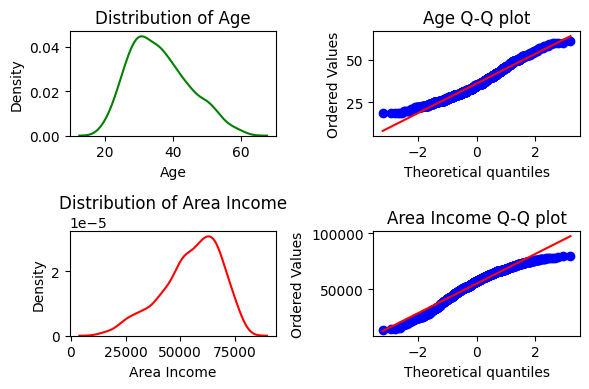

In [26]:
# here the distribution of the area income and age are skewed ditribution
plt.figure(figsize=(6,4))
plt.subplot(221)
sns.kdeplot(data['Age'],color='green')
plt.title('Distribution of Age')
plt.subplot(222)
stats.probplot(data['Age'],dist='norm',plot=plt)
plt.title('Age Q-Q plot')
plt.subplot(223)
sns.kdeplot(data['Area Income'],color='red')
plt.title('Distribution of Area Income')
plt.subplot(224)
stats.probplot(data['Area Income'],dist='norm',plot=plt)
plt.title('Area Income Q-Q plot')
plt.tight_layout()

In [27]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [28]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)


C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [29]:
y_pred=clf.predict(x_test)
y_pred2=clf2.predict(x_test)
print('Accuracy of logistic classifier:',accuracy_score(y_test,y_pred))
print('Accuracy of decisiontree classifier:',accuracy_score(y_test,y_pred2))

Accuracy of logistic classifier: 0.905
Accuracy of decisiontree classifier: 0.95


In [30]:
trf=FunctionTransformer(func=np.log1p)
trf.fit(x_train)
x_train_transformed=trf.transform(x_train)
x_test_transformed=trf.transform(x_test)

In [31]:
clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)


DecisionTreeClassifier()

In [32]:
y_pred=clf.predict(x_test_transformed)
y_pred2=clf2.predict(x_test_transformed)
print('Accuracy of logistic classifier:',accuracy_score(y_test,y_pred))
print('Accuracy of decisiontree classifier:',accuracy_score(y_test,y_pred2))

Accuracy of logistic classifier: 0.985
Accuracy of decisiontree classifier: 0.945


Here decision tree is not much affected because it is one of those algorithm which is not affected by the distribution of the data. But regression depends upon the distribution of the data. Regression assumes the normal distribution of the data thus after the tranformation the accuaracy-score of the regrsssion changed but not of the decision tree.

In [35]:
x_transfromed=trf.fit_transform(X)
clf=LogisticRegression()
clf1=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transfromed,Y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf1,x_transfromed,Y,scoring='accuracy',cv=10)))

LR 0.9659999999999999
DT 0.943


In [36]:
x_transfromed=pd.DataFrame(x_transfromed,columns=X.columns)

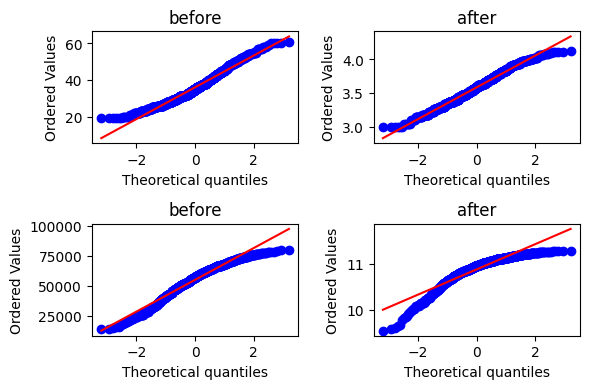

In [39]:
# here the distribution of the area income and age are skewed ditribution
plt.figure(figsize=(6,4))
plt.subplot(221)
stats.probplot(data['Age'],dist='norm',plot=plt)
plt.title('before')
plt.subplot(222)
stats.probplot(x_transfromed['Age'],dist='norm',plot=plt)
plt.title('after')
plt.subplot(223)
stats.probplot(data['Area Income'],dist='norm',plot=plt)
plt.title('before')
plt.subplot(224)
stats.probplot(x_transfromed['Area Income'],dist='norm',plot=plt)
plt.title('after')
plt.tight_layout()

Here we can see that after the transformation the area income has moredeviated from normal than before because the distribution of the left skewed dta is not affect4d by the log transform . But the distribution of the age has changed beacause it was previously left skewed.